I was asked a question as to how should testers know if there results are reasonable – this is important because they want to know when data should be flagged as out of the norm.

The approach I used here is to say that anything outside of 3σ of the mean should be looked at more closer. 3σ implies 99.7% of the data should be within that range.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.DataFrame([
[1,1670,1260,2310,2910,1270],
[2,1790,1340,2310,2170,1490],
[3,1720,1390,2280,2920,1340],
[4,1810,1430,2250,2230,1540],
[5,1770,1380,2270,2240,1380],
[6,1810,1420,2240,2180,1520],
[7,1660,1900,2450,2400,1315],
],
columns=['Unit','Ad_Cur','Sync_Cur','Str_Cur','Call_Cur','Nom_Cur',
])

display(df)
dft=df.melt(id_vars="Unit").set_index('Unit')

,Unit,Ad_Cur,Sync_Cur,Str_Cur,Call_Cur,Nom_Cur
0,1,1670,1260,2310,2910,1270
1,2,1790,1340,2310,2170,1490
2,3,1720,1390,2280,2920,1340
3,4,1810,1430,2250,2230,1540
4,5,1770,1380,2270,2240,1380
5,6,1810,1420,2240,2180,1520
6,7,1660,1900,2450,2400,1315


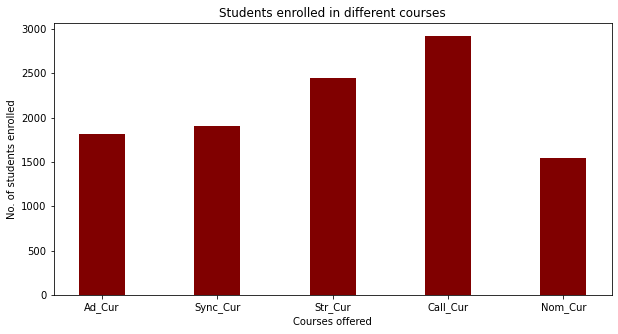

In [101]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dft['variable'], dft['value'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

In [102]:
df=df.drop('Unit',axis=1)

dfa = df[df.index==6]
df= df.drop(6,axis=0) 
display(dfa)
display(df)
data_mean = df.mean(axis=0)
data_std = 3*df.std(axis=0)
print(data_mean,data_std)

,Ad_Cur,Sync_Cur,Str_Cur,Call_Cur,Nom_Cur
6,1660,1900,2450,2400,1315


,Ad_Cur,Sync_Cur,Str_Cur,Call_Cur,Nom_Cur
0,1670,1260,2310,2910,1270
1,1790,1340,2310,2170,1490
2,1720,1390,2280,2920,1340
3,1810,1430,2250,2230,1540
4,1770,1380,2270,2240,1380
5,1810,1420,2240,2180,1520


Ad_Cur      1761.666667
Sync_Cur    1370.000000
Str_Cur     2276.666667
Call_Cur    2441.666667
Nom_Cur     1423.333333
dtype: float64 Ad_Cur       168.017856
Sync_Cur     187.829710
Str_Cur       88.317609
Call_Cur    1102.991387
Nom_Cur      327.902425
dtype: float64


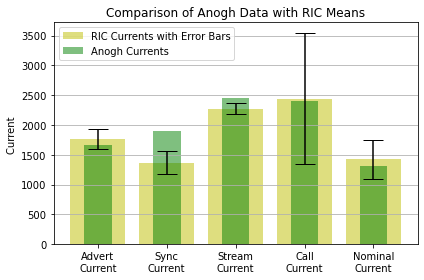

In [104]:
columns=['Advert\nCurrent','Sync\nCurrent','Stream\nCurrent','Call\nCurrent','Nominal\nCurrent']
x_pos=np.arange(len(columns))
fig, ax = plt.subplots()
#ax.bar(x_pos, data_mean, yerr=data_std, align='center', alpha=0.5, ecolor='black', capsize=10,color='red')
ax.bar(x_pos, df.mean(axis=0), width=0.8,yerr=data_std, capsize=10,alpha=0.5,
        color='y', label='RIC Currents with Error Bars')
ax.bar(x_pos, dfa.mean(axis=0), 
        width=0.4, color='g', alpha=0.5, label='Anogh Currents')
ax.set_ylabel('Current ')
ax.set_xticks(x_pos)
ax.set_xticklabels(columns)
ax.set_title('Comparison of Anogh Data with RIC Means')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.legend(loc="upper left")
plt.show()

The measurements by Anogh appear reasonable. The stream current is a bit out of the norm, but I would argue the iPhone stream currents are unusually consistent — I would argue what Anogh is seeing is more normal.